In [10]:
packageVersion('IRdisplay')
packageVersion('IRkernel')
packageVersion('repr')

[1] ‘0.4.9000’

[1] ‘0.6’

[1] ‘0.9’

In [11]:
clean_column <- function(data_frame, column_name) {
    data_frame[column_name] <- tolower(data_frame[column_name])
    for (symbol in c("-", "_", ".", "$", "%", "@", "!", "*")) {
        data_frame[column_name] = lapply(data_frame[column_name], function(x) gsub(paste("\\", symbol, sep=""), "", x))
    }
    return(data_frame)
}

In [12]:
df = rbind(
    read.csv("data/kijiji_cars.csv"), 
    read.csv("data/ottawahonda_cars.csv"),
    read.csv("data/tonygrahamtoyota_cars.csv"),
    read.csv("data/jimtubman_cars.csv")
)

df$price <- lapply(df$price, function(x) gsub("\\$", "", x))
df$price <- lapply(df$price, function(x) gsub("\\,", "", x))
df$price <- as.integer(df$price)
    
df$age = 2016 - df$year
df = clean_column(df, "make")
df = clean_column(df, "model")
df = clean_column(df, "year")

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = c(173364, 86548, 41900, 23006, : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = c(5, 5, 5, 5, 6, 5, 5, 10, : invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = c(30279L, 53883L, 34243L, 27971L, : invalid factor level, NA generatedWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs int

In [13]:
nrow(df)

[1] 1099

In [14]:
colnames(df)

[1] "domain"      "description" "date_listed" "url"         "make"       
 [6] "title"       "year"        "kilometers"  "model"       "price"      
[11] "age"

In [ ]:
library(dplyr)

efficiency = read.csv("data/nrcan_fuel_ratings.csv")
efficiency = clean_column(efficiency, "make")
efficiency = clean_column(efficiency, "model")
efficiency = clean_column(efficiency, "year")
nrow(efficiency)
colnames(efficiency)

In [ ]:
df <- dplyr::left_join(df, efficiency, by=c("make" = "make", "model" = "model", "year" = "year"))  
nrow(df)
colnames(df)

In [ ]:
maintenance = read.csv("data/maintenance_costs_manual_collection.csv")
maintenance = clean_column(maintenance, "make")
maintenance = clean_column(maintenance, "model")
maintenance = clean_column(maintenance, "year")
nrow(maintenance)
colnames(maintenance)

In [ ]:
df <- left_join(df, maintenance, by=c("make" = "make", "model" = "model", "year" = "year"))  
nrow(df)
colnames(df)

Warning message:
: Removed 243 rows containing missing values (geom_point).

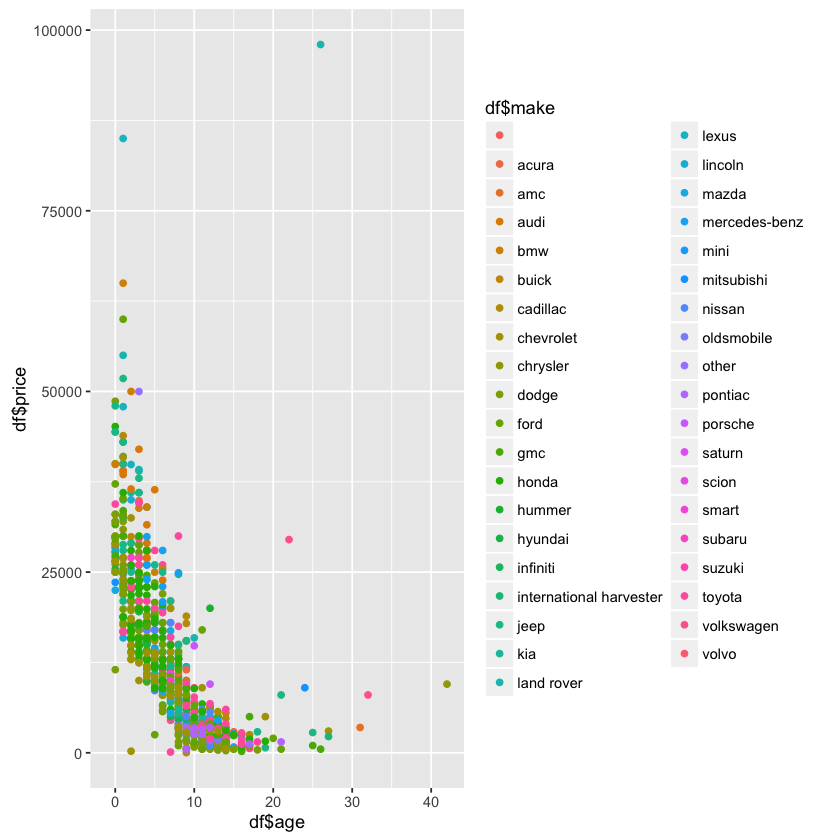

In [33]:
library(ggplot2)
ggplot(df) + geom_point(aes(x=df$age, y=df$price, colour=df$make))

Warning message:
: Removed 152 rows containing missing values (geom_point).

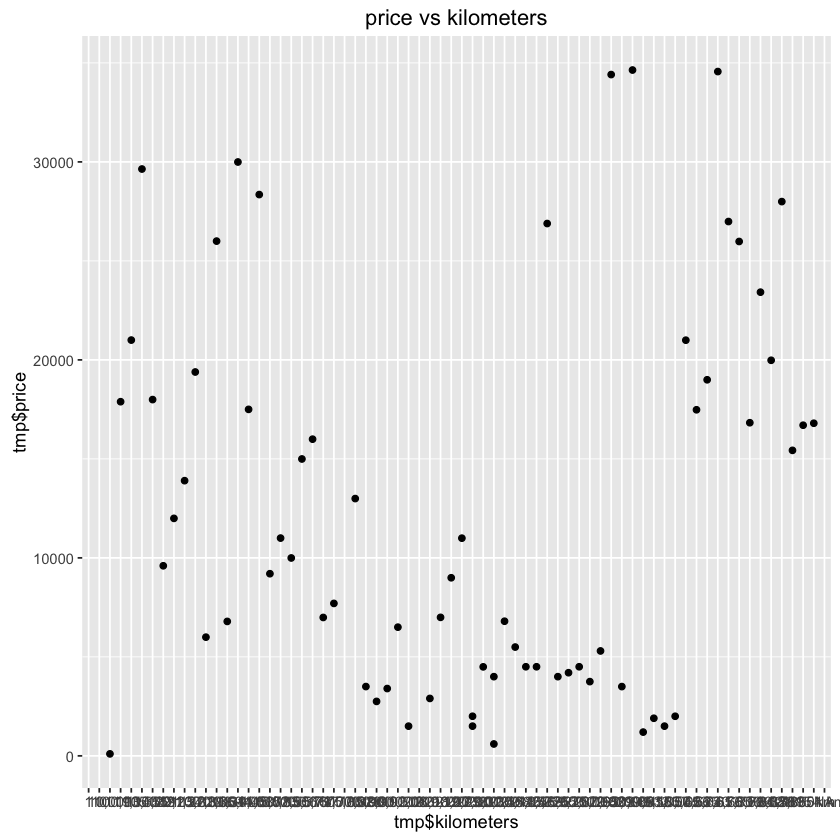

In [36]:
library(ggplot2)
tmp <- df[df$make == "toyota", ]
ggplot(tmp) + geom_point(aes(x=tmp$kilometers, y=tmp$price)) + ggtitle("price vs kilometers")